# Project: IBM HR – Employee Attrition

Source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

## Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

In [2]:
from pandas import DataFrame as dfm

In [3]:
# Import statements required for Plotly
# Plotly is used to get details when hovered
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [5]:
#IBM_HR = pd.read_csv('IBM_HR_Employee/HR-Employee-Attrition.csv')
IBM_HR = pd.read_csv('HR-Employee-Attrition.csv')
#IBM_HR = pd.read_csv('HR-Attrition-upsampled-cleaned2.csv')

In [6]:
df1 = IBM_HR

In [16]:
df1.shape

(2466, 21)

In [17]:
df1.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,49,No,Travel_Frequently,'Research & Development',8,1,'Life Sciences',3,Male,2,...,Married,5130,1,No,23,4,1,3,3,10


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 21 columns):
Age                         2466 non-null int64
Attrition                   2466 non-null object
BusinessTravel              2466 non-null object
Department                  2466 non-null object
DistanceFromHome            2466 non-null int64
Education                   2466 non-null int64
EducationField              2466 non-null object
EnvironmentSatisfaction     2466 non-null int64
Gender                      2466 non-null object
JobInvolvement              2466 non-null int64
JobSatisfaction             2466 non-null int64
MaritalStatus               2466 non-null object
MonthlyIncome               2466 non-null int64
NumCompaniesWorked          2466 non-null int64
OverTime                    2466 non-null object
PercentSalaryHike           2466 non-null int64
RelationshipSatisfaction    2466 non-null int64
StockOptionLevel            2466 non-null int64
TrainingTimesLastYear 

## General EDA - Cleaning - Visualization

In [19]:
# Review cols
df1cols = [i for i in df1.columns]
display(df1cols)

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany']

#### Subscript to generate DFs

In [20]:



df1cols = [i for i in df1.columns]
display(df1cols)

for i in df1cols:

    dfr = pd.crosstab(df1[i], df1['Attrition'], margins=True,
                      )
    dfr['YesRatio'] = round((dfr['Yes'] / dfr['All'])*100, 2)
    dfr['YesRatNo'] = round((dfr['Yes'] / dfr['No'])*100, 2)
    dfr.drop(labels=['All'], axis=0, inplace=True)
    
    display(
        dfr.head(2).sort_values('YesRatio', ascending=True),
        dfr.tail(2).sort_values('YesRatio', ascending=False)
        # pd.crosstab(df1[i], df1['Attrition'], margins=True,
        # aggfunc='sum'
    )

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany']

Attrition,No,Yes,All,YesRatio,YesRatNo
Age,,,,,
18,4,20,24,83.33,500.00
19,3,38,41,92.68,1266.67


Attrition,No,Yes,All,YesRatio,YesRatNo
Age,,,,,
59,10,0,10,0.0,0.0
60,5,0,5,0.0,0.0


Attrition,No,Yes,All,YesRatio,YesRatNo
Attrition,,,,,
No,1233,0,1233,0.0,0.0
Yes,0,1233,1233,100.0,inf


Attrition,No,Yes,All,YesRatio,YesRatNo
Attrition,,,,,
Yes,0,1233,1233,100.0,inf
No,1233,0,1233,0.0,0.0


Attrition,No,Yes,All,YesRatio,YesRatNo
BusinessTravel,,,,,
Non-Travel,138,52,190,27.37,37.68
Travel_Frequently,208,338,546,61.90,162.50


Attrition,No,Yes,All,YesRatio,YesRatNo
BusinessTravel,,,,,
Travel_Frequently,208,338,546,61.90,162.50
Travel_Rarely,887,843,1730,48.73,95.04


Attrition,No,Yes,All,YesRatio,YesRatNo
Department,,,,,
'Research & Development',828,681,1509,45.13,82.25
'Human Resources',51,66,117,56.41,129.41


Attrition,No,Yes,All,YesRatio,YesRatNo
Department,,,,,
Sales,354,486,840,57.86,137.29
'Research & Development',828,681,1509,45.13,82.25


Attrition,No,Yes,All,YesRatio,YesRatNo
DistanceFromHome,,,,,
1,182,139,321,43.30,76.37
2,183,165,348,47.41,90.16


Attrition,No,Yes,All,YesRatio,YesRatNo
DistanceFromHome,,,,,
29,22,16,38,42.11,72.73
28,21,7,28,25.00,33.33


Attrition,No,Yes,All,YesRatio,YesRatNo
Education,,,,,
2,238,219,457,47.92,92.02
1,139,154,293,52.56,110.79


Attrition,No,Yes,All,YesRatio,YesRatNo
Education,,,,,
4,340,320,660,48.48,94.12
5,43,30,73,41.10,69.77


Attrition,No,Yes,All,YesRatio,YesRatNo
EducationField,,,,,
'Life Sciences',517,481,998,48.20,93.04
'Human Resources',20,36,56,64.29,180.00


Attrition,No,Yes,All,YesRatio,YesRatNo
EducationField,,,,,
Medical,401,316,717,44.07,78.80
Other,71,55,126,43.65,77.46


Attrition,No,Yes,All,YesRatio,YesRatNo
EnvironmentSatisfaction,,,,,
2,244,220,464,47.41,90.16
1,212,376,588,63.95,177.36


Attrition,No,Yes,All,YesRatio,YesRatNo
EnvironmentSatisfaction,,,,,
3,391,331,722,45.84,84.65
4,386,306,692,44.22,79.27


Attrition,No,Yes,All,YesRatio,YesRatNo
Gender,,,,,
Female,501,461,962,47.92,92.02
Male,732,772,1504,51.33,105.46


Attrition,No,Yes,All,YesRatio,YesRatNo
Gender,,,,,
Male,732,772,1504,51.33,105.46
Female,501,461,962,47.92,92.02


Attrition,No,Yes,All,YesRatio,YesRatNo
JobInvolvement,,,,,
2,304,392,696,56.32,128.95
1,55,131,186,70.43,238.18


Attrition,No,Yes,All,YesRatio,YesRatNo
JobInvolvement,,,,,
3,743,641,1384,46.32,86.27
4,131,69,200,34.50,52.67


Attrition,No,Yes,All,YesRatio,YesRatNo
JobSatisfaction,,,,,
2,234,229,463,49.46,97.86
1,223,337,560,60.18,151.12


Attrition,No,Yes,All,YesRatio,YesRatNo
JobSatisfaction,,,,,
3,369,376,745,50.47,101.9
4,407,291,698,41.69,71.5


Attrition,No,Yes,All,YesRatio,YesRatNo
MaritalStatus,,,,,
Divorced,294,178,472,37.71,60.54
Married,589,427,1016,42.03,72.50


Attrition,No,Yes,All,YesRatio,YesRatNo
MaritalStatus,,,,,
Single,350,628,978,64.21,179.43
Married,589,427,1016,42.03,72.50


Attrition,No,Yes,All,YesRatio,YesRatNo
MonthlyIncome,,,,,
1051,1,0,1,0.0,0.0
1009,0,4,4,100.0,inf


Attrition,No,Yes,All,YesRatio,YesRatNo
MonthlyIncome,,,,,
19973,1,0,1,0.0,0.0
19999,1,0,1,0.0,0.0


Attrition,No,Yes,All,YesRatio,YesRatNo
NumCompaniesWorked,,,,,
0,174,125,299,41.81,71.84
1,423,524,947,55.33,123.88


Attrition,No,Yes,All,YesRatio,YesRatNo
NumCompaniesWorked,,,,,
9,40,71,111,63.96,177.50
8,43,26,69,37.68,60.47


Attrition,No,Yes,All,YesRatio,YesRatNo
OverTime,,,,,
No,944,572,1516,37.73,60.59
Yes,289,661,950,69.58,228.72


Attrition,No,Yes,All,YesRatio,YesRatNo
OverTime,,,,,
Yes,289,661,950,69.58,228.72
No,944,572,1516,37.73,60.59


Attrition,No,Yes,All,YesRatio,YesRatNo
PercentSalaryHike,,,,,
12,165,145,310,46.77,87.88
11,169,211,380,55.53,124.85


Attrition,No,Yes,All,YesRatio,YesRatNo
PercentSalaryHike,,,,,
24,15,38,53,71.70,253.33
25,17,6,23,26.09,35.29


Attrition,No,Yes,All,YesRatio,YesRatNo
RelationshipSatisfaction,,,,,
2,258,240,498,48.19,93.02
1,219,293,512,57.23,133.79


Attrition,No,Yes,All,YesRatio,YesRatNo
RelationshipSatisfaction,,,,,
4,368,343,711,48.24,93.21
3,388,357,745,47.92,92.01


Attrition,No,Yes,All,YesRatio,YesRatNo
StockOptionLevel,,,,,
1,540,299,839,35.64,55.37
0,477,799,1276,62.62,167.51


Attrition,No,Yes,All,YesRatio,YesRatNo
StockOptionLevel,,,,,
3,70,82,152,53.95,117.14
2,146,53,199,26.63,36.30


Attrition,No,Yes,All,YesRatio,YesRatNo
TrainingTimesLastYear,,,,,
1,62,40,102,39.22,64.52
0,39,68,107,63.55,174.36


Attrition,No,Yes,All,YesRatio,YesRatNo
TrainingTimesLastYear,,,,,
6,59,39,98,39.80,66.10
5,105,60,165,36.36,57.14


Attrition,No,Yes,All,YesRatio,YesRatNo
WorkLifeBalance,,,,,
2,286,288,574,50.17,100.7
1,55,132,187,70.59,240.0


Attrition,No,Yes,All,YesRatio,YesRatNo
WorkLifeBalance,,,,,
4,126,133,259,51.35,105.56
3,766,680,1446,47.03,88.77


Attrition,No,Yes,All,YesRatio,YesRatNo
YearsAtCompany,,,,,
1,112,314,426,73.71,280.36
0,28,80,108,74.07,285.71


Attrition,No,Yes,All,YesRatio,YesRatNo
YearsAtCompany,,,,,
40,0,7,7,100.0,inf
37,1,0,1,0.0,0.0


#### 

In [21]:
# Move Target/label var to the front of the DF
switchcol = df1['Attrition']
df1.drop(labels=['Attrition'], axis=1,inplace = True)
df1.insert(0, 'Attrition', switchcol)
#df1.head(2)


# Move JobSatisfaction to the front of the DF
switchcol = df1['JobSatisfaction']
df1.drop(labels=['JobSatisfaction'], axis=1,inplace = True)
df1.insert(1, 'JobSatisfaction', switchcol)
df1.head(1)

,Attrition,JobSatisfaction,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,No,2,49,Travel_Frequently,'Research & Development',8,1,'Life Sciences',3,Male,...,Married,5130,1,No,23,4,1,3,3,10


In [22]:
# review null values
df1.isnull().any()

Attrition                   False
JobSatisfaction             False
Age                         False
BusinessTravel              False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
JobInvolvement              False
MaritalStatus               False
MonthlyIncome               False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
RelationshipSatisfaction    False
StockOptionLevel            False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
dtype: bool

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 21 columns):
Attrition                   2466 non-null object
JobSatisfaction             2466 non-null int64
Age                         2466 non-null int64
BusinessTravel              2466 non-null object
Department                  2466 non-null object
DistanceFromHome            2466 non-null int64
Education                   2466 non-null int64
EducationField              2466 non-null object
EnvironmentSatisfaction     2466 non-null int64
Gender                      2466 non-null object
JobInvolvement              2466 non-null int64
MaritalStatus               2466 non-null object
MonthlyIncome               2466 non-null int64
NumCompaniesWorked          2466 non-null int64
OverTime                    2466 non-null object
PercentSalaryHike           2466 non-null int64
RelationshipSatisfaction    2466 non-null int64
StockOptionLevel            2466 non-null int64
TrainingTimesLastYear 

In [24]:
df1['Attrition'].value_counts()

No     1233
Yes    1233
Name: Attrition, dtype: int64

In [25]:
# attrition percent
df1['Attrition'].value_counts() / sum(df1['Attrition'].value_counts())

No     0.5
Yes    0.5
Name: Attrition, dtype: float64

In [26]:
df1['BusinessTravel'].value_counts() / df1['Attrition'].value_counts()

No                  NaN
Non-Travel          NaN
Travel_Frequently   NaN
Travel_Rarely       NaN
Yes                 NaN
dtype: float64

In [27]:
# reviewing value counts for descriptive features

valuecounts1 = pd.DataFrame(df1['BusinessTravel'].value_counts())
valuecounts2 = pd.DataFrame(df1['Department'].value_counts())
valuecounts3 = pd.DataFrame(df1['EducationField'].value_counts())
#valuecounts4 = pd.DataFrame(df1['Gender'].value_counts())
valuecounts5 = pd.DataFrame(df1['JobRole'].value_counts())
valuecounts6 = pd.DataFrame(df1['MaritalStatus'].value_counts())
valuecounts7 = pd.DataFrame(df1['Over18'].value_counts())
valuecounts8 = pd.DataFrame(df1['OverTime'].value_counts())
valuecounts9 = pd.DataFrame(df1['Attrition'].value_counts())

display(valuecounts1,
        valuecounts2,
        valuecounts3,
        #        valuecounts4,
        valuecounts5,
        valuecounts6,
        valuecounts7,
        valuecounts8,
        valuecounts9)

KeyError: 'JobRole'

##### test

In [ ]:
catvars = ['BusinessTravel', 'Department', 'EducationField',
           'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

for i in catvars:
    """result = catvars.groupby(
        [i])['Attrition'].reset_index().sort_values('Attrition')
    sns.barplot(x='Id', data=catvars, order=result['Id'])"""

    pd.crosstab(df1[i], df1['Attrition']).plot(kind='bar',
                                               fontsize=22,
                                               figsize=(
                                                   20, 10),
                                               rot=1
                                               )
    plt.xlabel(xlabel=i, size = 32)
    #plt.title(label=i, size=40)

##### test

In [ ]:
"""# Review cols
df1cols = [i for i in df1.columns]
display(df1cols)
"""
for i in df1cols:
    pd.crosstab(df1[i], df1['Attrition']).plot(kind='bar',
                                               fontsize=22,
                                               figsize=(20, 10)
                                               )
    plt.xlabel(xlabel=i, size = 32)
    #plt.title(label=i, size=40)
    

    # display(dfm(df1[i].value_counts() / sum(df1['Attrition'].value_counts())))
# plt.title(‘Attrition with respect to Gender’)

In [ ]:
pd.crosstab(df1['Gender'], df1['Attrition'], margins=True)

In [ ]:
dfr = pd.crosstab(df1['Age'], df1['Attrition'], margins=True,
                  # aggfunc='sum'
                  )
dfr['YesRatTot'] = round((dfr['Yes'] / dfr['All'])*100, 2)
dfr['YesRatNo'] = round((dfr['Yes'] / dfr['No'])*100, 2)
# dfr.sort_values('YesRatio', ascending=False)
dfr.drop(labels=['All'], axis=0, inplace=True)
dfrtop = dfr.head(2).sort_values('YesRatTot', ascending=False)
dfrbot = dfr.tail(2).sort_values('YesRatNo', ascending=False)

dfrmer= [dfrtop, dfrbot]
pd.concat(dfrmer)


In [ ]:
# Review cols
df1cols = [i for i in df1.columns]
display(df1cols)


In [ ]:
dfr.columns

In [ ]:
"""# Review cols
df1cols = [i for i in df1.columns]
display(df1cols)
"""

notuseful = ['DailyRate', 'Attrition', 'EmployeeNumber', 'EmployeeCount',
             'MonthlyIncome', 'MonthlyRate', 'Over18']

for i in df1cols:

    dfr = pd.crosstab(df1[i], df1['Attrition'], margins=True,
                      )
    dfr['YesRatio'] = round((dfr['Yes'] / dfr['All'])*100, 2)
    dfr['YesRatNo'] = round((dfr['Yes'] / dfr['No'])*100, 2)
    dfr.drop(labels=['All'], axis=0, inplace=True)
    dfrtop = dfr.head(2).sort_values('YesRatio', ascending=False)
    dfrbot = dfr.tail(2).sort_values('YesRatio', ascending=False)
    dfrmer = [dfrtop, dfrbot]
    display(

        pd.concat(dfrmer)
        # pd.crosstab(df1[i], df1['Attrition'], margins=True,
        # aggfunc='sum'
    )

### Visualization

#### Numeric

In [ ]:
num_counts = pd.crosstab([df1['Department'], df1['Gender']], df1['Attrition'], margins=True)
num_counts

In [ ]:
# Visulazing the distibution of the data for every feature
df1.hist(edgecolor='lightblue', linewidth=1.2, figsize=(16, 16))

#### Graphic

In [ ]:
colstoplot_freq = ['BusinessTravel', 'Department',
                   'EducationField', 'JobRole', 'MaritalStatus']

for i in colstoplot_freq:
    sns.factorplot(data=df1, kind='count', size=10,
                   # aspect=1.5,
                   x=i)

In [ ]:
df1.info()

In [ ]:
colstoplot_box = ['Age', 
                  'JobLevel', 
                  'NumCompaniesWorked',
                  'HourlyRate', 
                  'WorkLifeBalance', 
                  'PerformanceRating']

for i in colstoplot_box:
    sns.factorplot(data=df1, y=i, x='Attrition', size=12, 
                   aspect=1, 
                   kind='box')

## Statistics, Data Manipulation, Pre-Model

### Data Manipulation

In [ ]:
# review datatypes - are they numeric or strings
df1.info()

In [7]:
# replace values in label, yes/no with 1/0. ONLY RUN ONCE!
yesnoVals = {'Yes': 1,
             'No': 0}

df1['Attrition'] = df1['Attrition'].map(yesnoVals)
df1['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [8]:
# replace values in label, yes/no with 1/0. ONLY RUN ONCE!

yesnoVals = {'Yes': 1,
             'No': 0}
df1['OverTime'] = df1['OverTime'].map(yesnoVals)
df1['OverTime'].head()

0    1
1    0
2    1
3    1
4    0
Name: OverTime, dtype: int64

In [ ]:
# replace values in label. ONLY RUN ONCE!

YandNVals = {'Y': 1,
             'N': 0}
df1['Over18'] = df1['Over18'].map(YandNVals)
df1['Over18'].head()

In [ ]:
# replace values in label ONLY RUN ONCE!

genderM = {'Male': 1,
           'Female': 0}
genderF = {'Female': 1,
           'Male': 0}
df1['GenderM'] = df1['Gender'].map(genderM)            
df1['GenderF'] = df1['Gender'].map(genderF)
df1.drop(labels=['Gender'], axis=1,inplace = True)
display(df1['GenderM'].head(),
       df1['GenderF'].head())

In [ ]:
# review datatypes - are they numeric or strings
df1.info()

#### Graphic

### Statistics

In [ ]:
#Correlation Matrix
corr = df1.corr()
corr = (corr)
plt.figure(figsize=(30, 30))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#corr

In [ ]:
# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 180, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#plt.figure(figsize=(30, 30))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
df2 = IBM_HR
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome          

In [12]:

df2.drop(labels=['StandardHours'], axis=1,inplace = True)
df2.drop(labels=['EmployeeCount'], axis=1,inplace = True)
df2.drop(labels=['EmployeeNumber'], axis=1,inplace = True)
df2.drop(labels=['DailyRate'], axis=1,inplace = True)
df2.drop(labels=['HourlyRate'], axis=1,inplace = True)
df2.drop(labels=['MonthlyRate'], axis=1,inplace = True)


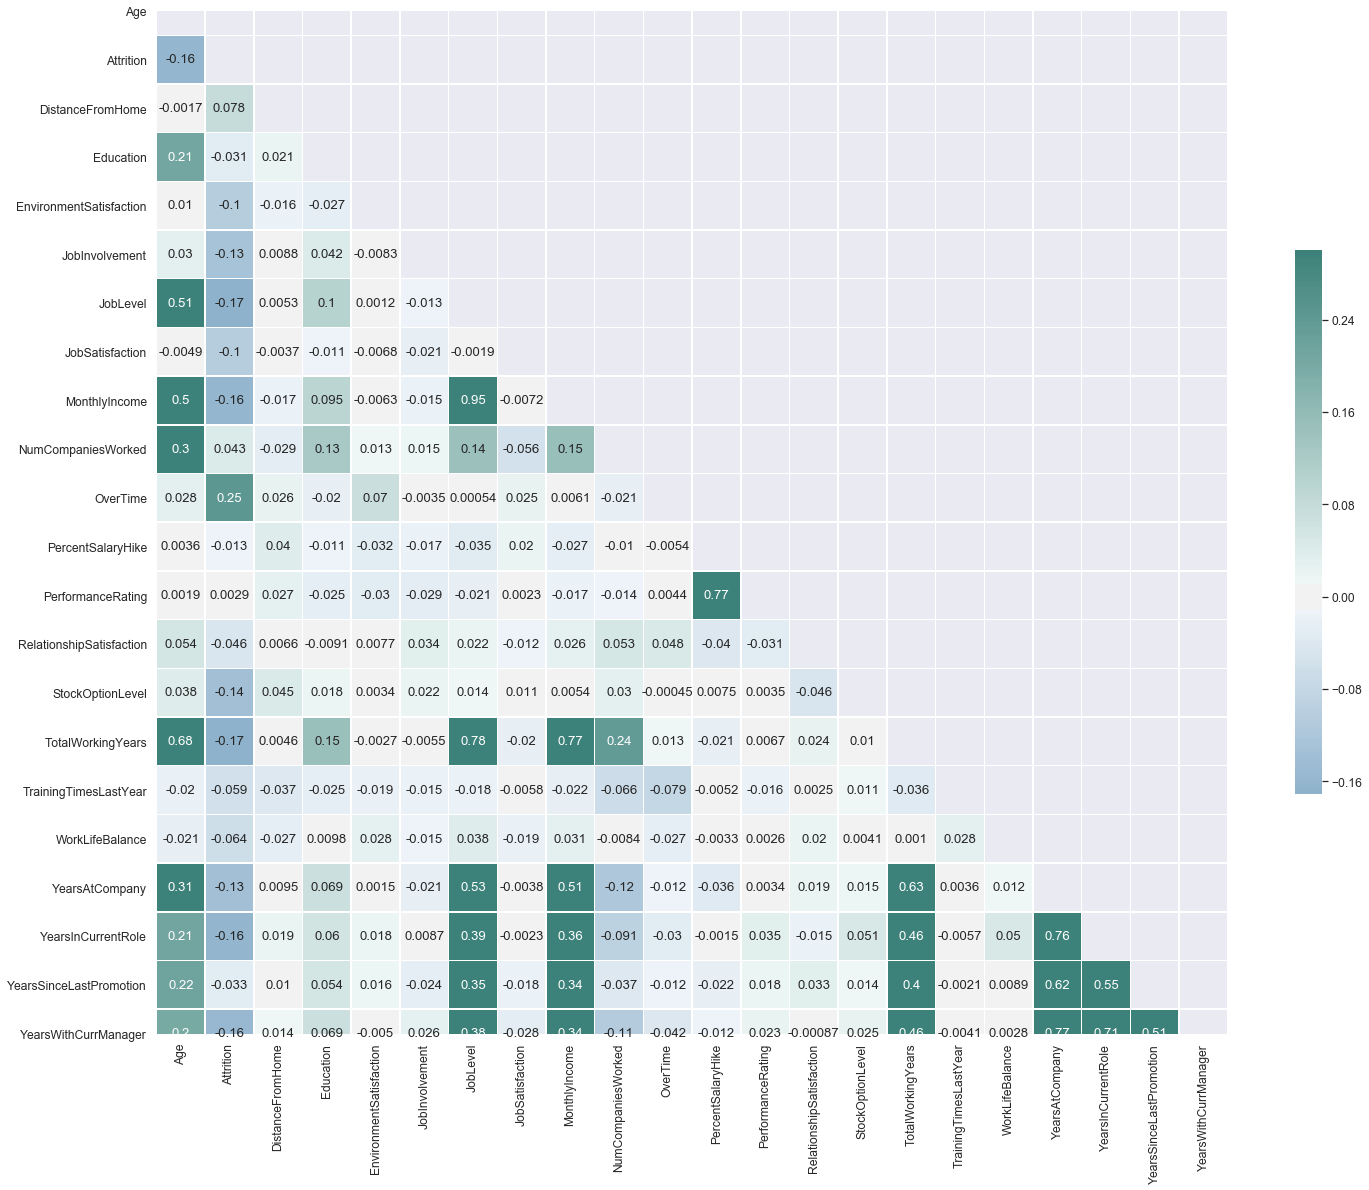

In [13]:
from seaborn import clustermap
# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(30, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 180, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(font_scale=1.1)
plt.figure(figsize=(24, 20))

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [31]:
corr2=corr
corr2.drop(labels=['Attrition'], axis=0,inplace = True)

Text(0.5, 0, 'Attrition Correlation')

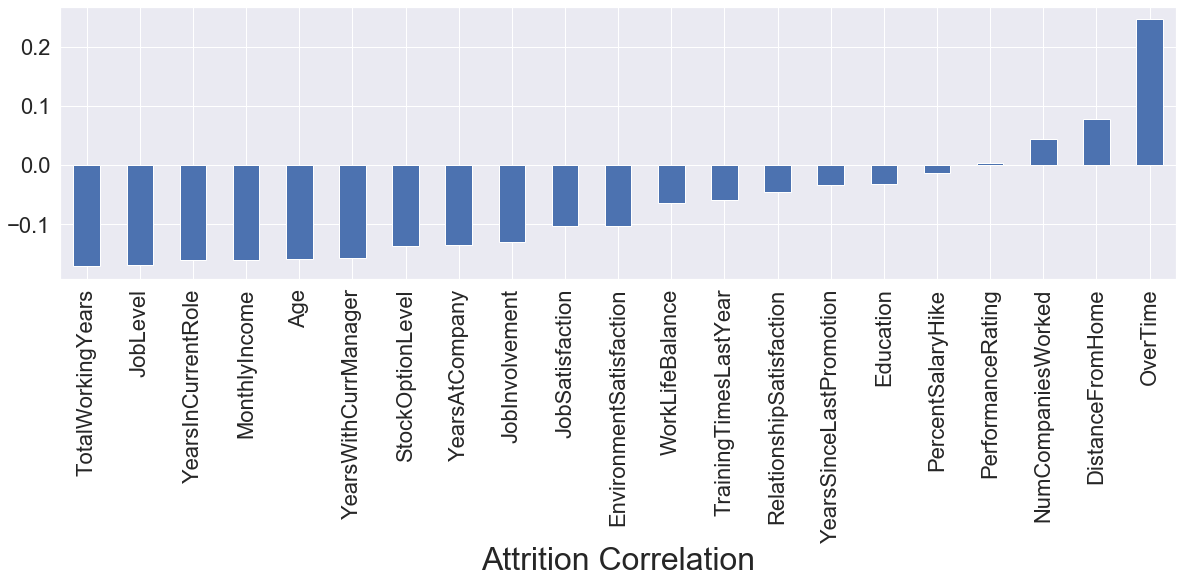

In [46]:
# corr2=corr
# sns.set(font_scale=1.1)
#plt.figure(figsize=(15, 10))
corr2['Attrition'].sort_values().plot(kind='bar',
                                      fontsize=22,
                                      figsize=(20, 5)
                                      )
plt.xlabel(xlabel='Attrition Correlation', size=32)

In [51]:
corr3 = corr2
corr3.T
dfm(corr3['Attrition'].sort_values())

,Attrition
TotalWorkingYears,-0.171063
JobLevel,-0.169105
YearsInCurrentRole,-0.160545
MonthlyIncome,-0.159840
Age,-0.159205
YearsWithCurrManager,-0.156199
StockOptionLevel,-0.137145
YearsAtCompany,-0.134392
JobInvolvement,-0.130016
JobSatisfaction,-0.103481


In [53]:
round(dfm(corr2['Attrition'].describe()),4)


,Attrition
count,21.0000
mean,-0.0696
std,0.1032
min,-0.1711
25%,-0.1562
50%,-0.1034
75%,-0.0314
max,0.2461


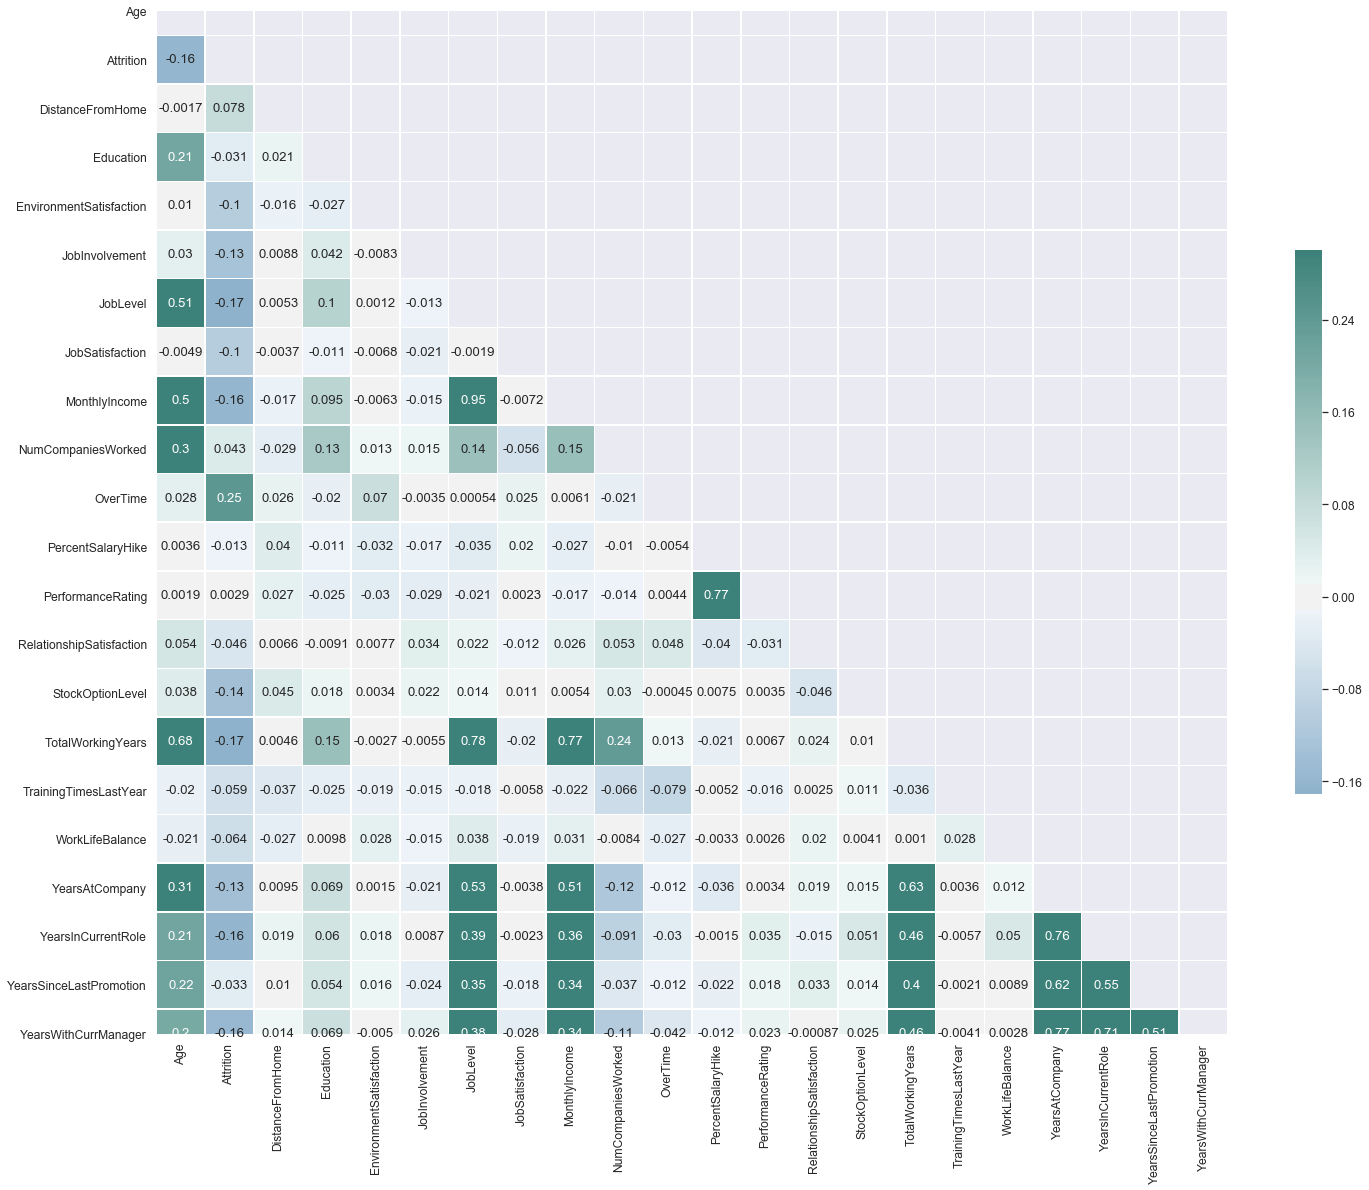

In [28]:
from seaborn import clustermap
# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(30, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 180, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(font_scale=1.1)
plt.figure(figsize=(24, 20))

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### Pre-Modeling

In [ ]:
# placeholder

In [ ]:
# Threshold for removing correlated variables
threshold = 0.8

# Absolute value correlation matrix
corr_matrix = df3.corr().abs()
corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(
    np.triu(
        np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(
    upper[column] > threshold)]

print('There are %d columns to remove :' % (len(to_drop)))

data = data.drop(columns=to_drop)

to_drop

## Modeling

#### Model 1

In [28]:
# Load modeling libraries
from sklearn.tree            import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn                 import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree          import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display       import Image  
import pydotplus  

# Install if needed
#(conda install pydotplus) or (pip install pydotplus)
#(conda install graphviz) or (pip install graphviz)

# If there are issues with graphviz, run the code below. If InvocationException
#import os
#os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"


C:\Users\MasterDK-Laptop\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [ ]:
colstoplot = ['BusinessTravel', 'Department',
              'EducationField', 'JobRole', 'MaritalStatus']

for i in colstoplot:
    sns.factorplot(data=df1, kind='count', size=10, 
                  # aspect=1.5, 
                   x=i)

In [32]:
# FEATURE SELECTION
# - - -

# drop certain columns
df2 = df1
df2.drop(labels=['BusinessTravel'], axis=1,inplace = True)
df2.drop(labels=['Department'], axis=1,inplace = True)
df2.drop(labels=['EducationField'], axis=1,inplace = True)
df2.drop(labels=['JobRole'], axis=1,inplace = True)
df2.drop(labels=['MaritalStatus'], axis=1,inplace = True)

# split dataset in features and target variable
feature_cols = [i 
                for i in IBM_HR.columns]

del feature_cols[0]
X = df1[feature_cols] # Features
Y = df1['Attrition']  # Target variable

# review that the correct features were added
display('target', pd.DataFrame(Y).columns,
        'features', pd.DataFrame(X).columns)

KeyError: "['JobRole'] not found in axis"

In [33]:
# SPLIT THE DATA
# - - -
# split dataset in features and target variable
feature_cols = [i 
                for i in IBM_HR.columns]

del feature_cols[0]
X = df1[feature_cols] # Features
Y = df1['Attrition']  # Target variable

# review that the correct features were added
display('target', pd.DataFrame(Y).columns,
        'features', pd.DataFrame(X).columns)

# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) # 80% training and 20% test

'target'

Index(['Attrition'], dtype='object')

'features'

Index(['JobSatisfaction', 'Age', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [34]:
#BUILDING DECISION TREE MODEL
# - - -

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "gini",
                             splitter  = 'best', 
                             max_depth = None) 


# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

ValueError: could not convert string to float: 'Male'

In [ ]:
# EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

In [ ]:
# VISUALIZE THE DECISION TREE

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Attrition.png')
Image(graph.create_png())

In [ ]:
# Optimizing Decision Tree Performance

# Create Decision Tree classifer object
# criterion - using "gini" for Gini index  | “entropy” for the information gain.
# splitter  - “best”  choose the best split | “random” to choose the best random split.
# max_depth - higher value of maximum depth causes overfitting, and a lower value causes underfitting
clf2 = DecisionTreeClassifier(criterion = 'entropy', 
                              splitter  = 'random',
                              max_depth = 3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,Y_train)

# Predict the response for test dataset
Y_pred = clf2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

In [ ]:
# VISUALIZE NEW DECISION TREE

dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Attrition2.png')
Image(graph.create_png())

In [ ]:
!pip install fastcluster

In [ ]:
sns.clustermap(df1.corr(), annot=True, fmt='d', standard_scale=1,
               annot_kws={"size": 16})